In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
fashion_train_df= pd.read_csv('fashion-mnist_train.csv')

In [4]:
fashion_test_df = pd.read_csv('fashion-mnist_test.csv')

In [5]:
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
fashion_train_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
fashion_train_df.shape

(60000, 785)

In [8]:
fashion_test_df.shape

(10000, 785)

In [9]:
training = np.array(fashion_train_df,dtype='float32')
testing = np.array(fashion_test_df,dtype='float32')

In [10]:
training.shape

(60000, 785)

In [11]:
import random

0.0

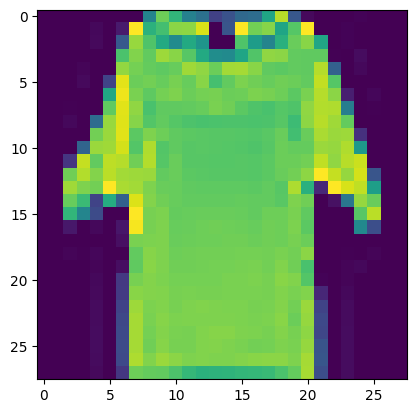

In [12]:
i = random.randint(0,60001) 
plt.imshow(training[i,1:].reshape(28,28)) 
label = training[i,1] 
label

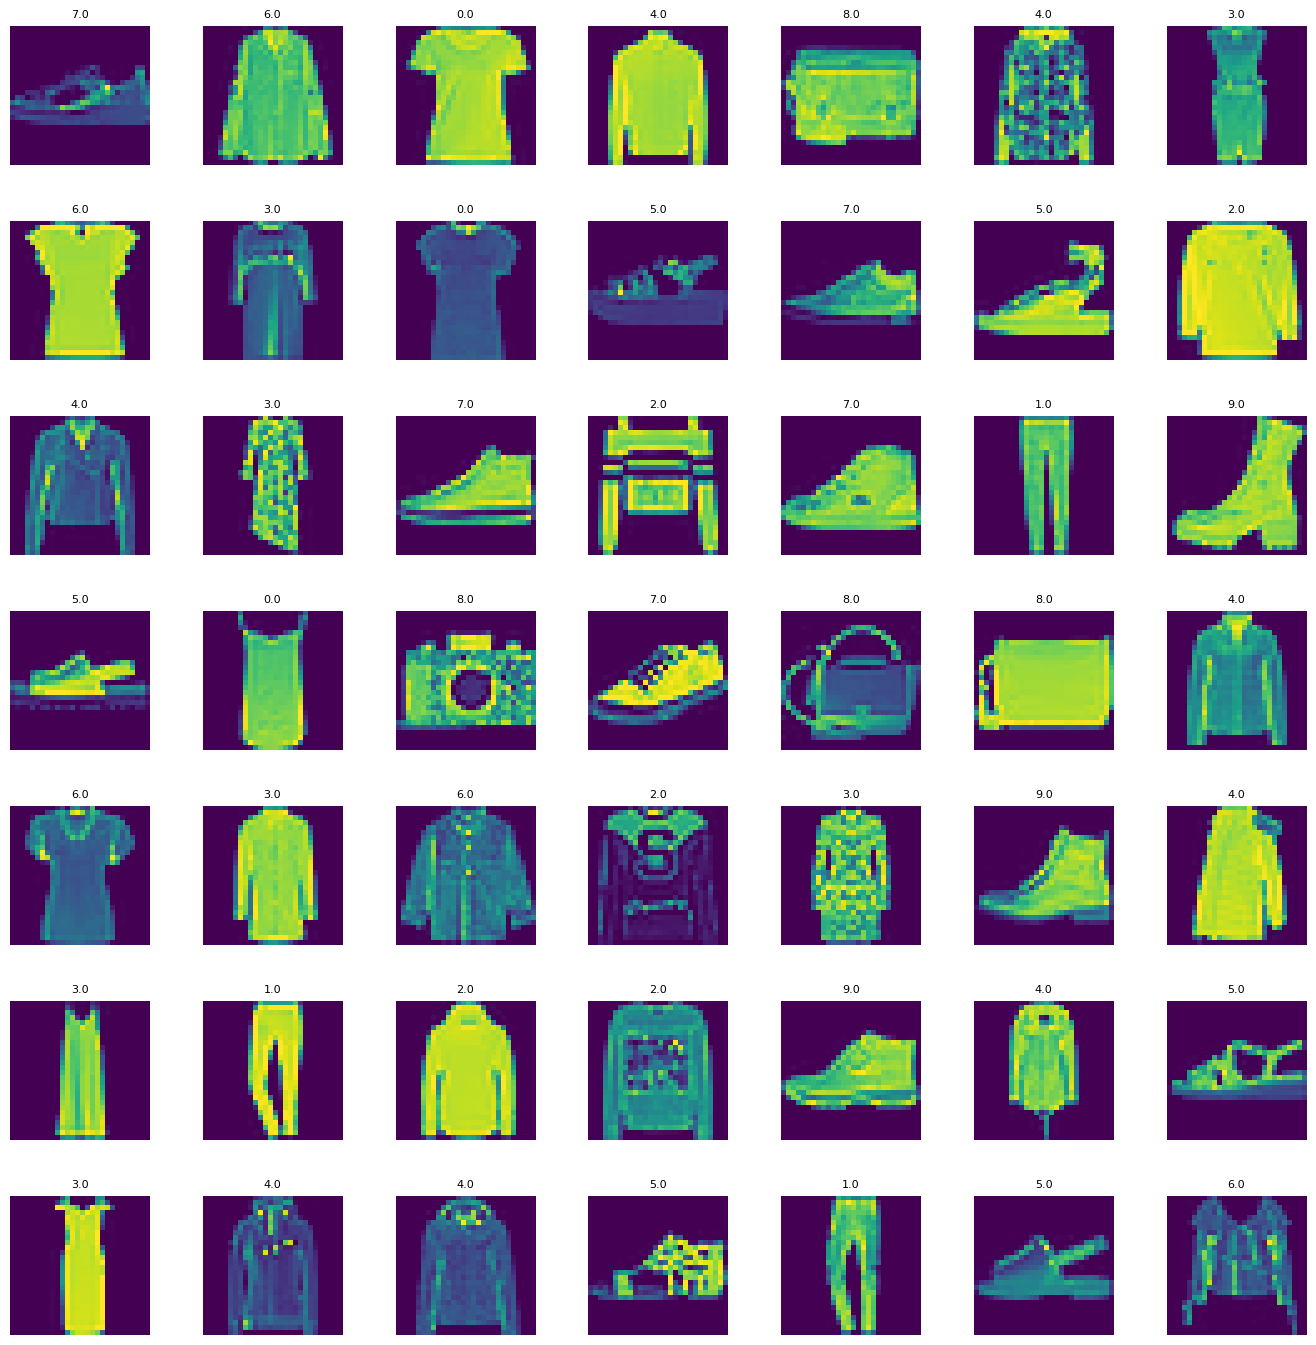

In [13]:
W_grid = 7
L_grid = 7

fig,axes = plt.subplots(L_grid,W_grid,figsize =(17,17))

axes = axes.ravel() 
n_training = len(training) 



for i in np.arange(0,W_grid*L_grid):
        index = np.random.randint(0,n_training)
        axes[i].imshow(training[index,1:].reshape((28,28)))
        axes[i].set_title(training[index,0],fontsize = 8)
        axes[i].axis('off')
        
plt.subplots_adjust(hspace=0.4)  

In [14]:
X_train = training[:,1:]/255
y_train = training[:,0]
X_test = testing[:,1:]/255
y_test = testing[:,0]

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train,test_size = 0.2,random_state = 12345) 

In [16]:
X_train = X_train.reshape(X_train.shape[0],*(28,28,1))
X_test = X_test.reshape(X_test.shape[0],*(28,28,1))
X_validate = X_validate.reshape(X_validate.shape[0],*(28,28,1))

In [17]:
X_train.shape

(48000, 28, 28, 1)

In [18]:
X_test.shape

(10000, 28, 28, 1)

In [19]:
X_validate.shape

(12000, 28, 28, 1)

In [26]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard

In [27]:
cnn_model = Sequential()
cnn_model.add(Conv2D(32,3,3,input_shape = (28,28,1),activation = 'relu'))
cnn_model.add(MaxPooling2D(pool_size= (2,2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(32,activation = 'relu'))
cnn_model.add(Dense(10,activation = 'sigmoid'))
cnn_model.compile(loss ='sparse_categorical_crossentropy',optimizer = Adam(learning_rate=0.001),metrics= ['accuracy'])

In [28]:
epochs = 200

In [29]:
cnn_model.fit(X_train,y_train,batch_size =512,epochs = epochs,verbose = 1,validation_data = (X_validate,y_validate) )

Epoch 1/200
94/94 [==============================] - 4s 21ms/step - loss: 1.4225 - accuracy: 0.5754 - val_loss: 0.7848 - val_accuracy: 0.7265
Epoch 2/200
94/94 [==============================] - 1s 13ms/step - loss: 0.6887 - accuracy: 0.7555 - val_loss: 0.6232 - val_accuracy: 0.7721
Epoch 3/200
94/94 [==============================] - 1s 13ms/step - loss: 0.5853 - accuracy: 0.7899 - val_loss: 0.5712 - val_accuracy: 0.7932
Epoch 4/200
94/94 [==============================] - 1s 13ms/step - loss: 0.5347 - accuracy: 0.8064 - val_loss: 0.5243 - val_accuracy: 0.8144
Epoch 5/200
94/94 [==============================] - 1s 13ms/step - loss: 0.5025 - accuracy: 0.8189 - val_loss: 0.4972 - val_accuracy: 0.8203
Epoch 6/200
94/94 [==============================] - 1s 13ms/step - loss: 0.4816 - accuracy: 0.8264 - val_loss: 0.4806 - val_accuracy: 0.8267
Epoch 7/200
94/94 [==============================] - 1s 13ms/step - loss: 0.4660 - accuracy: 0.8311 - val_loss: 0.4694 - val_accuracy: 0.8291
Epoch 

94/94 [==============================] - 2s 21ms/step - loss: 0.3268 - accuracy: 0.8818 - val_loss: 0.3651 - val_accuracy: 0.8679
Epoch 59/200
94/94 [==============================] - 2s 20ms/step - loss: 0.3262 - accuracy: 0.8822 - val_loss: 0.3642 - val_accuracy: 0.8677
Epoch 60/200
94/94 [==============================] - 2s 17ms/step - loss: 0.3264 - accuracy: 0.8821 - val_loss: 0.3647 - val_accuracy: 0.8677
Epoch 61/200
94/94 [==============================] - 2s 17ms/step - loss: 0.3245 - accuracy: 0.8824 - val_loss: 0.3649 - val_accuracy: 0.8664
Epoch 62/200
94/94 [==============================] - 2s 17ms/step - loss: 0.3235 - accuracy: 0.8830 - val_loss: 0.3639 - val_accuracy: 0.8670
Epoch 63/200
94/94 [==============================] - 2s 17ms/step - loss: 0.3212 - accuracy: 0.8843 - val_loss: 0.3657 - val_accuracy: 0.8662
Epoch 64/200
94/94 [==============================] - 2s 16ms/step - loss: 0.3219 - accuracy: 0.8821 - val_loss: 0.3599 - val_accuracy: 0.8689
Epoch 65/200

94/94 [==============================] - 2s 21ms/step - loss: 0.2830 - accuracy: 0.8958 - val_loss: 0.3553 - val_accuracy: 0.8716
Epoch 116/200
94/94 [==============================] - 2s 23ms/step - loss: 0.2823 - accuracy: 0.8964 - val_loss: 0.3492 - val_accuracy: 0.8740
Epoch 117/200
94/94 [==============================] - 1s 15ms/step - loss: 0.2816 - accuracy: 0.8972 - val_loss: 0.3516 - val_accuracy: 0.8737
Epoch 118/200
94/94 [==============================] - 2s 20ms/step - loss: 0.2804 - accuracy: 0.8966 - val_loss: 0.3561 - val_accuracy: 0.8722
Epoch 119/200
94/94 [==============================] - 2s 24ms/step - loss: 0.2814 - accuracy: 0.8973 - val_loss: 0.3548 - val_accuracy: 0.8729
Epoch 120/200
94/94 [==============================] - 1s 15ms/step - loss: 0.2795 - accuracy: 0.8981 - val_loss: 0.3482 - val_accuracy: 0.8742
Epoch 121/200
94/94 [==============================] - 2s 23ms/step - loss: 0.2776 - accuracy: 0.8985 - val_loss: 0.3518 - val_accuracy: 0.8749
Epoch 

Epoch 172/200
94/94 [==============================] - 2s 23ms/step - loss: 0.2518 - accuracy: 0.9075 - val_loss: 0.3555 - val_accuracy: 0.8760
Epoch 173/200
94/94 [==============================] - 2s 18ms/step - loss: 0.2514 - accuracy: 0.9076 - val_loss: 0.3629 - val_accuracy: 0.8726
Epoch 174/200
94/94 [==============================] - 1s 13ms/step - loss: 0.2503 - accuracy: 0.9079 - val_loss: 0.3528 - val_accuracy: 0.8770
Epoch 175/200
94/94 [==============================] - 2s 20ms/step - loss: 0.2524 - accuracy: 0.9066 - val_loss: 0.3593 - val_accuracy: 0.8743
Epoch 176/200
94/94 [==============================] - 2s 22ms/step - loss: 0.2507 - accuracy: 0.9085 - val_loss: 0.3566 - val_accuracy: 0.8755
Epoch 177/200
94/94 [==============================] - 1s 16ms/step - loss: 0.2496 - accuracy: 0.9081 - val_loss: 0.3609 - val_accuracy: 0.8737
Epoch 178/200
94/94 [==============================] - 2s 25ms/step - loss: 0.2499 - accuracy: 0.9075 - val_loss: 0.3552 - val_accuracy:

In [30]:
evaluation = cnn_model.evaluate(X_test,y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

313/313 [==============================] - 1s 2ms/step - loss: 0.3486 - accuracy: 0.8802
Test Accuracy : 0.880


In [31]:
predicted_classes = np.argmax(cnn_model.predict(X_test),axis=-1)

313/313 [==============================] - 1s 2ms/step


In [32]:
predicted_classes

array([0, 1, 2, ..., 8, 8, 1], dtype=int64)

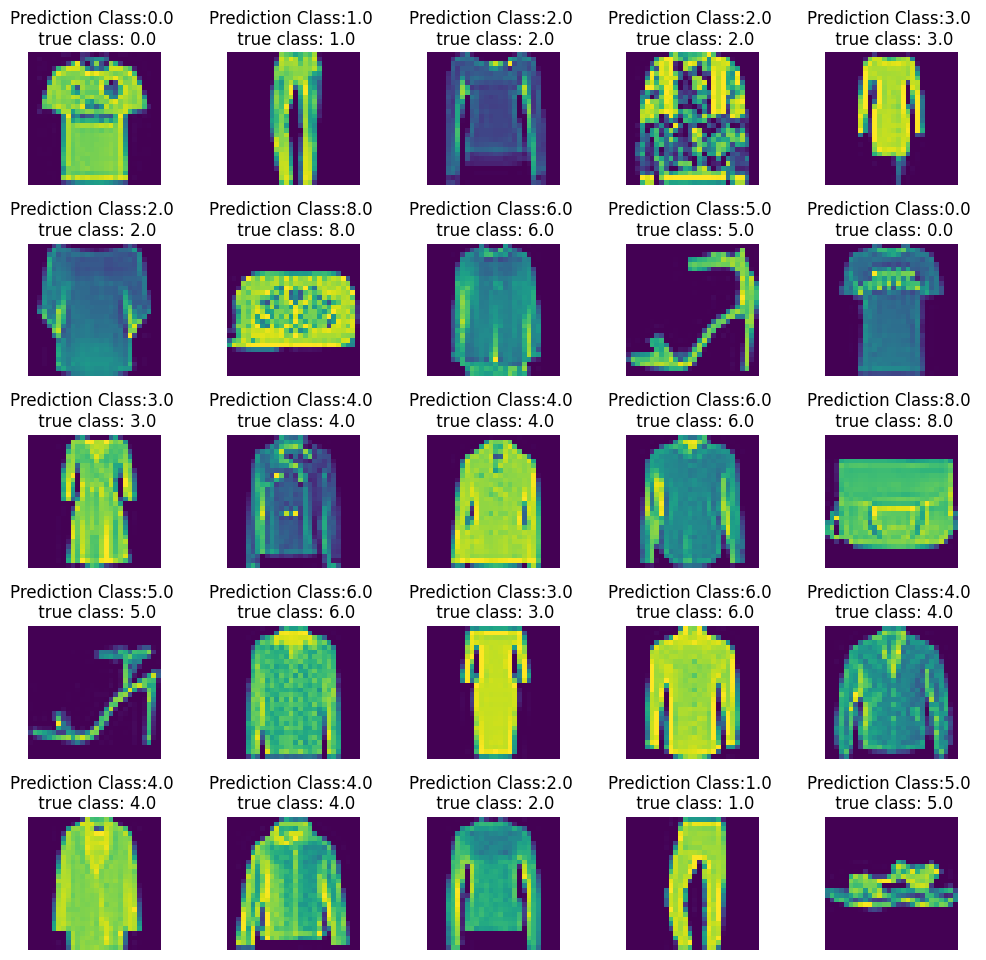

In [33]:
L = 5
W = 5

fig,axes = plt.subplots(L,W,figsize = (12,12))
axes = axes.ravel()
for i in np.arange(0,L*W):
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title('Prediction Class:{1} \n true class: {1}'.format(predicted_classes[i],y_test[i]))
    axes[i].axis('off')
plt.subplots_adjust(wspace = 0.5)  

In [34]:
from sklearn.metrics import classification_report

classes = 10
targets = ["Class {}".format(i) for i in range(classes)]
print(classification_report(y_test, predicted_classes, target_names = targets))

              precision    recall  f1-score   support

     Class 0       0.83      0.83      0.83      1000
     Class 1       0.97      0.98      0.98      1000
     Class 2       0.81      0.82      0.81      1000
     Class 3       0.89      0.91      0.90      1000
     Class 4       0.84      0.76      0.80      1000
     Class 5       0.95      0.96      0.95      1000
     Class 6       0.66      0.70      0.68      1000
     Class 7       0.93      0.93      0.93      1000
     Class 8       0.97      0.97      0.97      1000
     Class 9       0.95      0.95      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

